[*********************100%***********************]  1 of 1 completed
                    open          high           low         close      volume
Date                                                                          
2021-04-29  14204.509766  14211.570312  13952.799805  14082.549805  4854340000
2021-04-30  13970.730469  14084.759766  13941.629883  13962.679688  4762770000
2021-05-03  14031.769531  14042.120117  13881.509766  13895.120117  4718850000
2021-05-04  13774.509766  13795.570312  13485.589844  13633.500000  5852850000
2021-05-05  13731.129883  13753.049805  13553.929688  13582.419922  4517100000


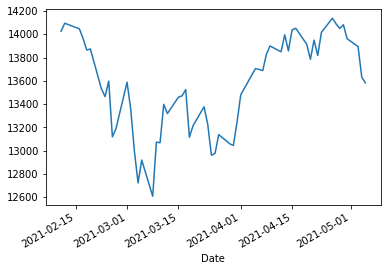

In [1]:
!pip install yfinance -q # 「-q」安靜模式，寫在yfinance前或後都可，避免顯示雜訊
import yfinance as yf 
import pandas as pd
import numpy as np
from tqdm import tqdm # 對list迴圈時，可顯示進度
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

# 爬個股的開高低收量，收盤價不使用還原權息後的股價
def ohlc(ticker, days = 25):
    # 以前n個營業日為起始日，爬至今天最新的股價資訊
    start = (pd.datetime.today() - pd.tseries.offsets.BDay( days )).strftime('%Y-%m-%d')
    df = pd.DataFrame(yf.download(ticker, start)) 
    df.columns = df.columns.str.lower() # 有些技術分析套件需要欄名都小寫，有些則需要字首大寫
    return df[['open','high','low','close','volume']] 

df = ohlc('^IXIC', 60)
print(df.tail())
df['close'].plot()  # 畫Nasdaq指數的價格走勢

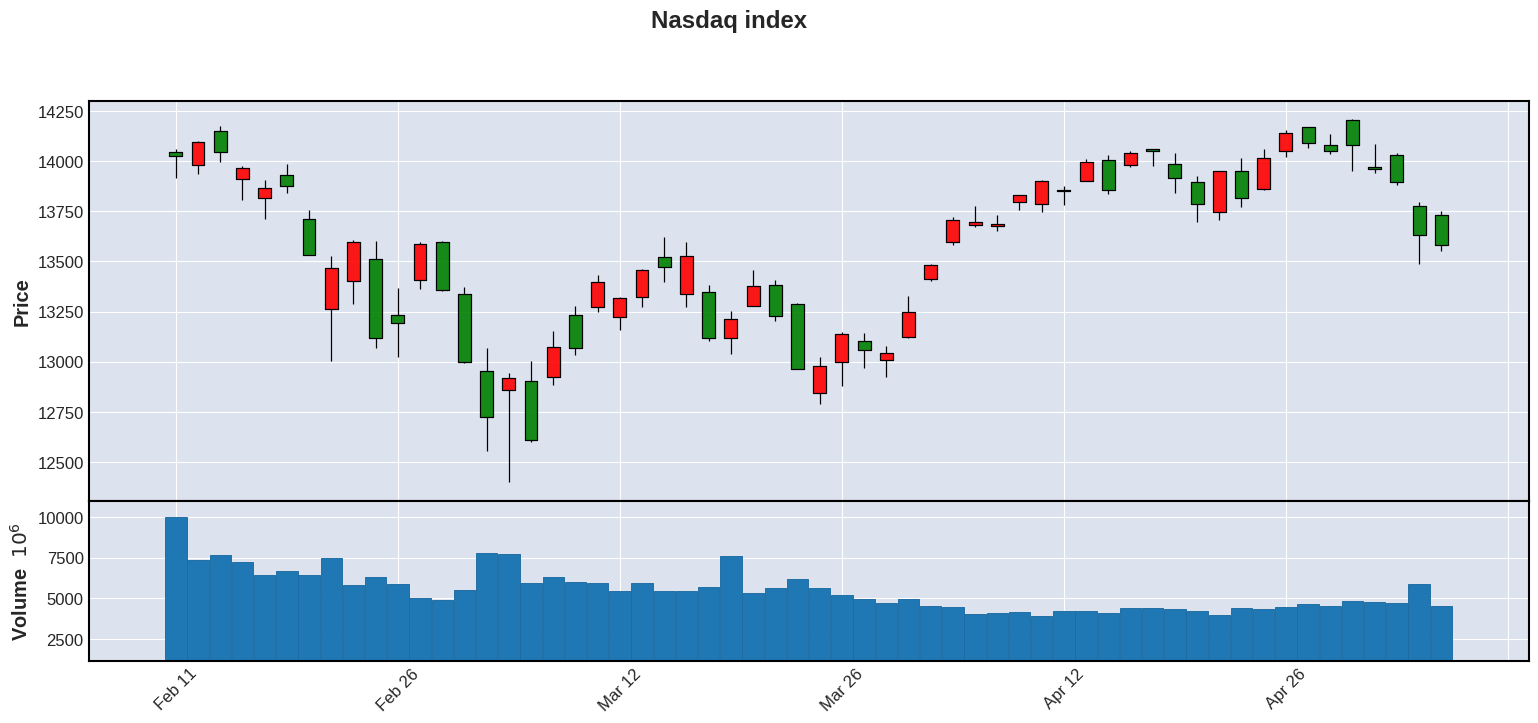

In [2]:
!pip install -q mplfinance 
import mplfinance as mpf # 畫K棒的套件

col = mpf.make_marketcolors(up = 'r', down = 'g', edge = 'k', wick = 'k')
sty = mpf.make_mpf_style( base_mpf_style = 'default', marketcolors = col) 
kwargs = dict(type = 'candle', volume = True, style = sty)
mpf.plot(df, **kwargs, figsize = (20,8), title = 'Nasdaq index')

--2021-05-06 05:59:21--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.141.102, 142.250.141.100, 142.250.141.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6jguhk3vbl4ib8fj3cpkk8gvqaop850l/1620280725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-05-06 05:59:23--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6jguhk3vbl4ib8fj3cpkk8gvqaop850l/1620280725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74

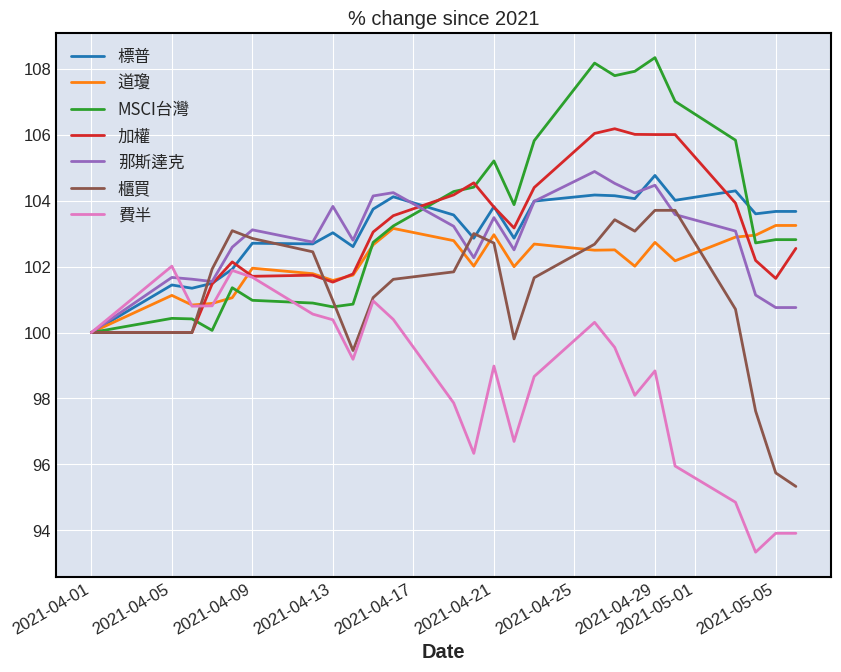

In [3]:
!pip install ffn -q # 算報酬表現的套件
import ffn

# colab畫圖中文不亂碼(若是在本機IDE已支援中文就不用執行)
from matplotlib.font_manager import FontProperties
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf
myfont = FontProperties(fname = r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

date = '2021'
df = pd.DataFrame({name: ohlc(ticker)['close'][date] 
                   for name, ticker in zip(['道瓊','那斯達克','標普','費半','MSCI台灣','加權','櫃買'],
                                        ['^DJI','^IXIC','^GSPC','^SOX','EWT','^TWII','^TWOII'])
                   }).fillna(method = 'ffill') 

ffn.rebase(df).sort_values(by = df.index[-1], ascending= False, axis= 1).plot(figsize=(10,8))
plt.title(f'% change since {date}') 
plt.legend(prop = myfont, loc = 0)  